## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Import pandas and numpy
import pandas as pd
import numpy as np

# Import libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library to train and split data
from sklearn.model_selection import train_test_split

# Import decision tree to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Import metrics to get diferent metric scores
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
)

# Import warnings to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/PGP-AIML/ML/project/Loan_Modelling.csv')
data = df.copy()

Mounted at /content/drive


## Data Overview

### Displaying the first few and last few rows of the dataset


In [ ]:
### Display top five rows
data.head(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
### Display bottom five rows
data.tail(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
### Checking the shape of the dataset
data.shape

(5000, 14)

**Observations**

- There are 5000 rows and 14 columns in the data set.


In [ ]:
### Checking the data types of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observations**

- 13 columns are of the *int* type columns and 1 column is of *float* type column.
- All columns are non-null columns.

In [ ]:
### Statistical summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observations**

* Customers age range is 23 to 67. Mean age is 45.
* Customers have average experience of 20 years.
* Customers average income is 73,774 dollars.
* Customers average credit card spending is about 1,930 dollars.
* While some do not spend much, 50% of them spend about 1,500 dollars.
* Average mortgage is about 56,000 dollars.
* 50% ore more customers do not have a mortgage loan.

In [ ]:
### Checking for duplicate values
data.duplicated().sum()

0

**Observations**

- There are no duplicate rows in the data set.

In [ ]:
### Drop columns
data = data.drop(["ID"], axis=1)

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
### check for missing values
data.isnull().sum()

,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0


**Observations**

- There are no missing values in any of the data columns.

### Check for Anomalous Values

In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

**Observations**

- There are three -ve values found in the data.

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

**Observations**

- This data could be user input error that can be corrected to respective positive numbers.

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
data["Education"].unique()

array([1, 2, 3])

**Observations**

- Education has no out of bound values, in other words they are as expected.

In [ ]:
# Map the education values for graphs
data["Education"].replace(1, "Undergraduate", inplace=True)
data["Education"].replace(2, "Graduate", inplace=True)
data["Education"].replace(3, "Professional", inplace=True)

### Feature Engineering

In [ ]:
## Find unique zipcodes
data["ZIPCode"].nunique()

467

**Observations**

- There are 467 unique zipocodes belong to the customers.

In [ ]:
## change the data type of zipcode to string
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
## string first two chars of the zipcode
data["ZIPCode"] = data["ZIPCode"].str[0:2]
## change the data type of zipcode to category
data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


**Observations**

- Try to narrow down to 7 unique three digit zipcode values within regions.
- Also, update the zipcode to the narrower zipcodes so we have more precise data.

In [ ]:
## Convert other categorical collumns to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

**Observations**

- Converting the data type of categorical features to 'category' helps us in our analysis in the exploratory data analysis.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(10, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Age - Histogram & Boxplot

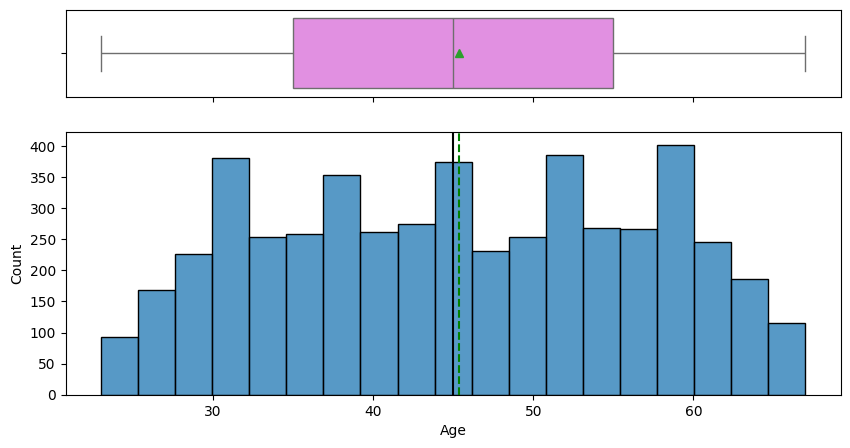

In [ ]:
histogram_boxplot(data, "Age")

**Observations**

- Age is faily distributed from 23 to 67.
- There are no outliers from the boxplot.

Experience - Histogram & Boxplot

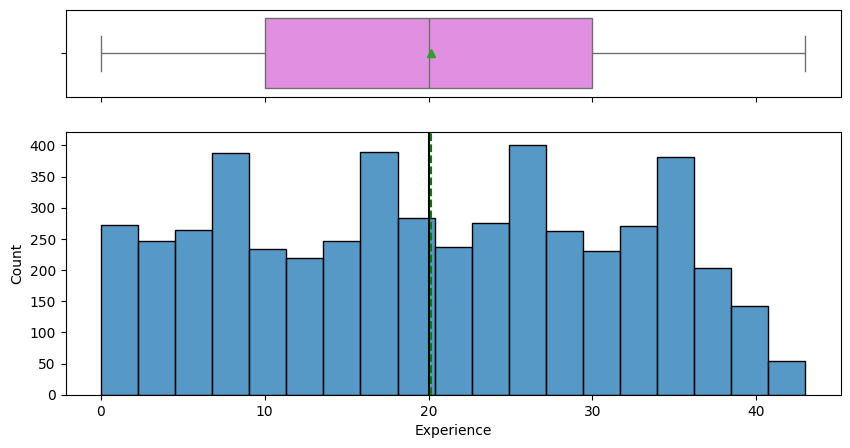

In [ ]:
histogram_boxplot(data, "Experience")

**Observations**

- Experience is faily distributed with mean experience of 20 years.
- There are no outliers from the boxplot.

### Income - Histogram & Boxplot

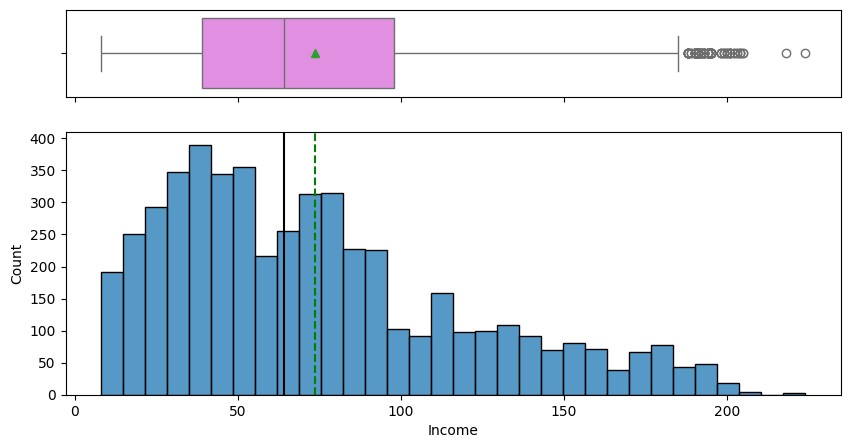

In [ ]:
histogram_boxplot(data, "Income")

**Observations**

* Income distribution is right skwed.
* About 50% of the customers have income 64,000 dollars or less.
* There are some outliers because of some customers have income more than 200,000 dollars.
* Keep the outliers as the customers with high income can be the customers taking a personal loan.

### CCAvg - Histogram & Boxplot

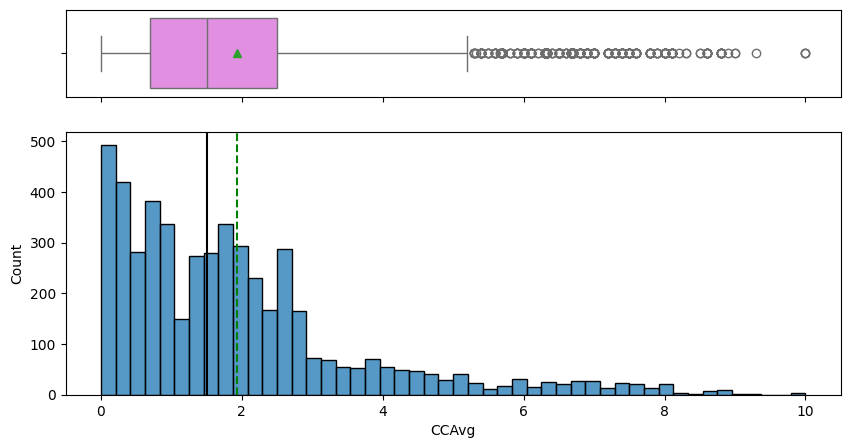

In [ ]:
histogram_boxplot(data, "CCAvg")

**Observations**

* CCAvg distribution is right skwed.
* About 50% of the customers have CCAvg of 1,500 dollars or less.
* There are some outliers because of some customers spend a lot using credit cards.

### Mortgage - Histogram & Boxplot

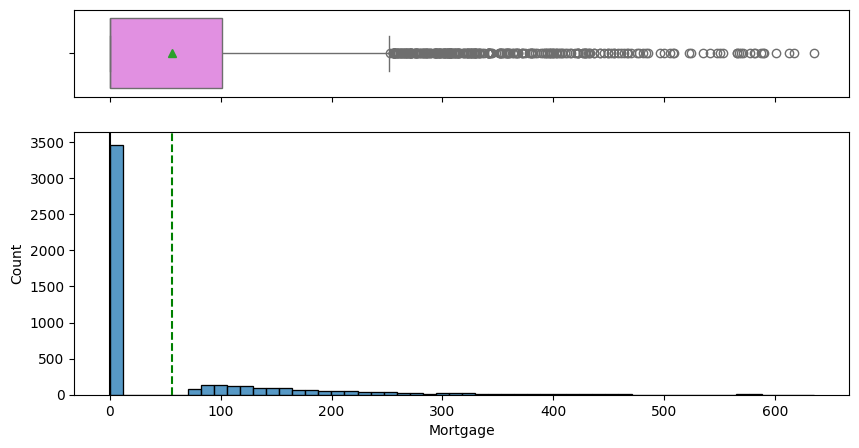

In [ ]:
histogram_boxplot(data, "Mortgage")

**Observations**

* Mortgage distribution is highly right skwed.
* Many customers have not take a mortgage loan with the bank.
* There are a lot outliers because of some customers have taken loans more than 100,000 dollars.
* Keep the outliers as the customers who have taken mortgage loan may also consider taking a personal loan.

### Family

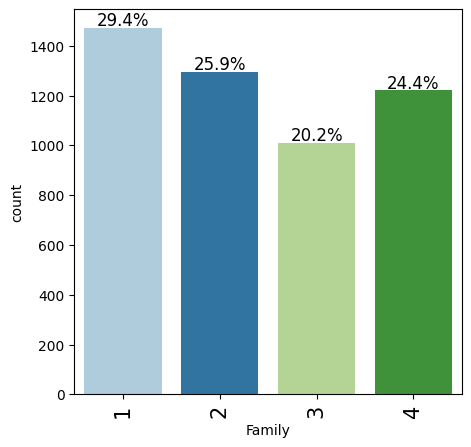

In [ ]:
labeled_barplot(data, "Family", perc=True)

**Observations**

* About 30% of the customers are single.
* Families with 2 or more may take a personal loan.

### Education

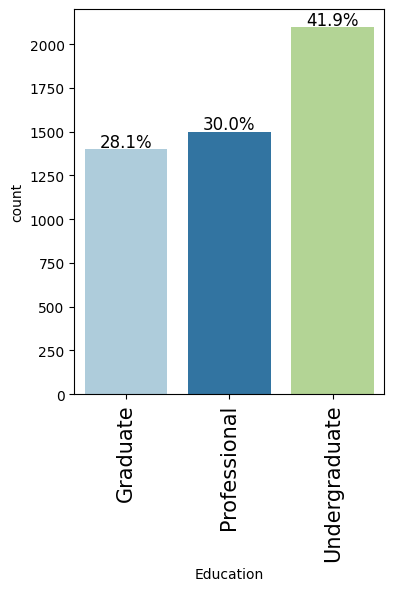

In [ ]:
labeled_barplot(data, "Education", perc=True)

**Observations**

* About 58% of the customers are graduate of higher.
* Education may or may not influence taking a personal loan.
* Higher education people likely may have taken student loan and they may also take personal loan.

### Securities_Account

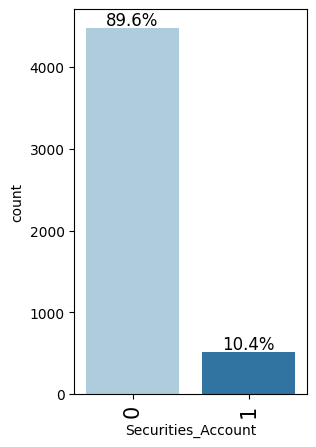

In [ ]:
labeled_barplot(data, "Securities_Account", perc=True)

**Observations**

* About 90% of the customers do not have securities account.
* Having a securities account may not lead to customer taking a personal loan. Sometimes people take a personal loan to buy / trade securities.

### CD_Account

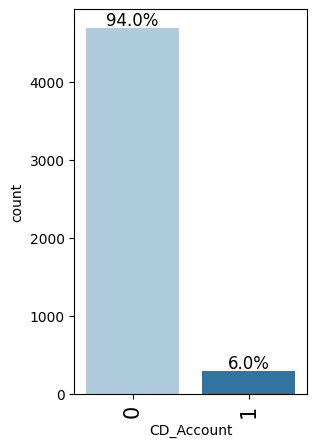

In [ ]:
labeled_barplot(data, "CD_Account", perc=True)

**Observations**

* 94% of the customers have a CD account with the bank.
* People open CD account to accure interest on the income they deposit.

### Online

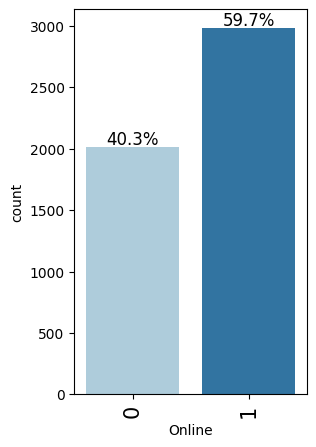

In [ ]:
labeled_barplot(data, "Online", perc=True)

**Observations**

* About 60% of the customers use online banking.
* Ideally online banking users tend to get knowledge of any new products banking offers, including personal loans.
* Online banking does not mean users will opt-in for a personal loan.

### CreditCard

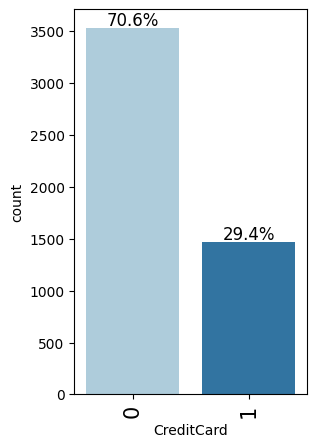

In [ ]:
labeled_barplot(data, "CreditCard", perc=True)

**Observations**

* About 70% of the customers do not use a credit card.
* In general, credit card users take loans due to awareness about the loans or because of a need.
* There is a high chance that a credit card user may take a personal loan.

### ZIPCode

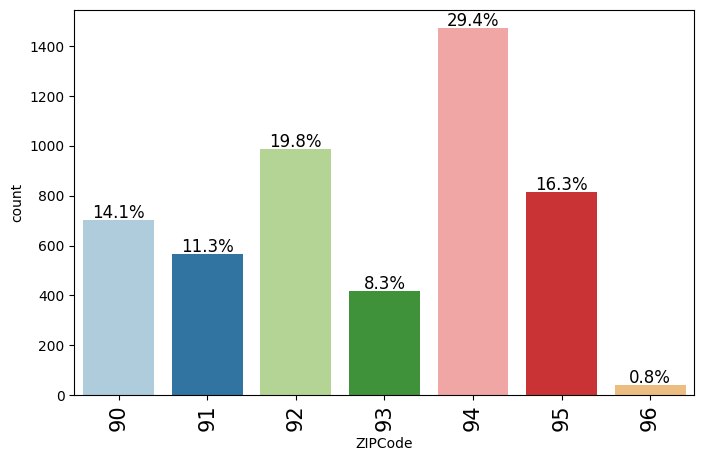

In [ ]:
labeled_barplot(data, "ZIPCode", perc=True)

**Observations**

* About 30% of the customers live in zipcode ending with 94, followed by 92 (~20%) and 95(~16%). Majority live in those three zipcodes.
* Living in a particular zipcode does not relate to taking a personal loan but it may indicate what type of people live there (example, wealthy, not-wealthy ..etc).

### Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 3, 3))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation heatmap

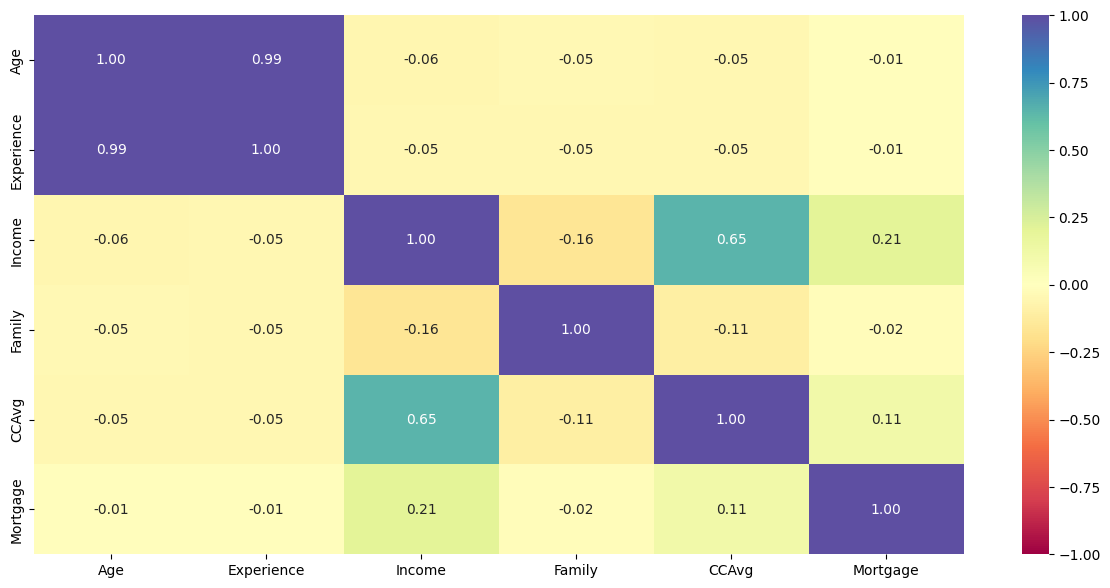

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**
* Age and Experience have a very high correlation that they seem to be redundant in the data set providing similar information.

* Income and CCAvg have a high correlation where credit card spending creases with increasing in income.

* Personal Loan has a moderate 0.5 correlation with income. A cutomer with good income has high probability will take a personal loan.

* Personal Loan has a positive 0.37 correlation with CCAvg. A cutomer with good spending habit has a good chance of taking a personal loan.

* Family has a negative correlation with Income and CCAvg indicating the income and spending goes down with increasing people count in a family.

### Personal Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
Professional   1296  205  1501
Graduate       1221  182  1403
Undergraduate  2003   93  2096
------------------------------------------------------------------------------------------------------------------------


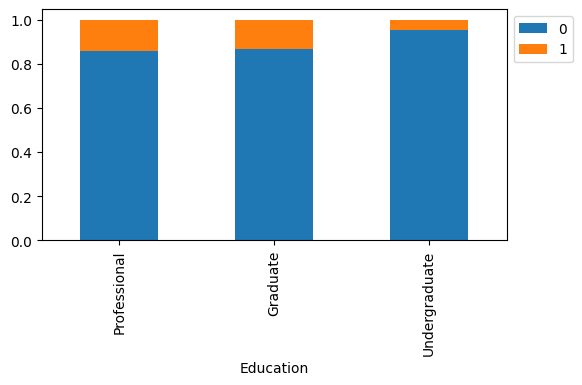

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

**Observations**
* Higher the education, the chances taking a personal loan is higher.
* Professional education customers have taken most personal loans, though it's not significant compared to the ones not taken a loan.

###Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


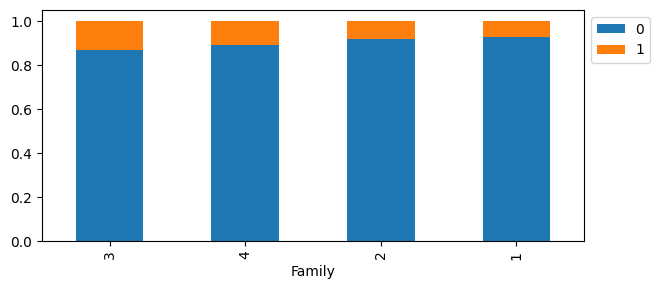

In [ ]:
stacked_barplot(data, "Family", "Personal_Loan")

**Observations**
* Family of 3 and 4 have taken higher number of personal loans compared to a family of 1 or 2.

###Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


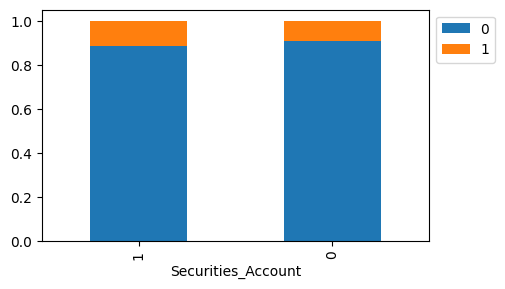

In [ ]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

**Observations**
* Having a securities account does not seem to have a significance in taking a personal loan.

#### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


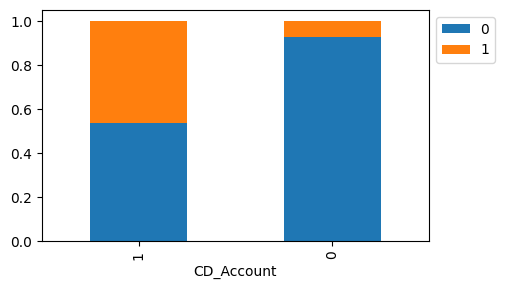

In [ ]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

**Observations**
* Customers with CD account are opting in a personal loan compared to the customer who do not have a CD account.

#### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


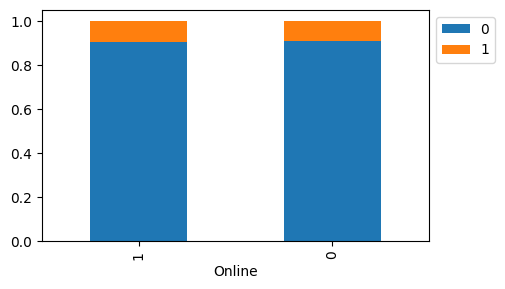

In [ ]:
stacked_barplot(data, "Online", "Personal_Loan")

**Observations**
* Online presence has no significance in customers applying for a personal loan.

#### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


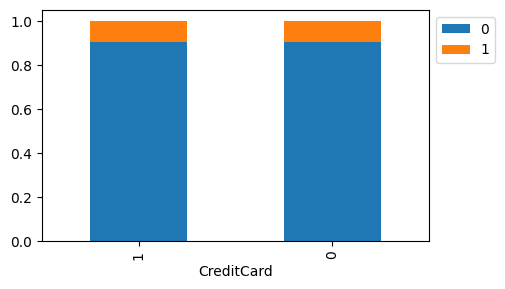

In [ ]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

**Observations**
* Having a CreditCard has not much significance in customers applying for a personal loan.

###Personal_Loan vs Age

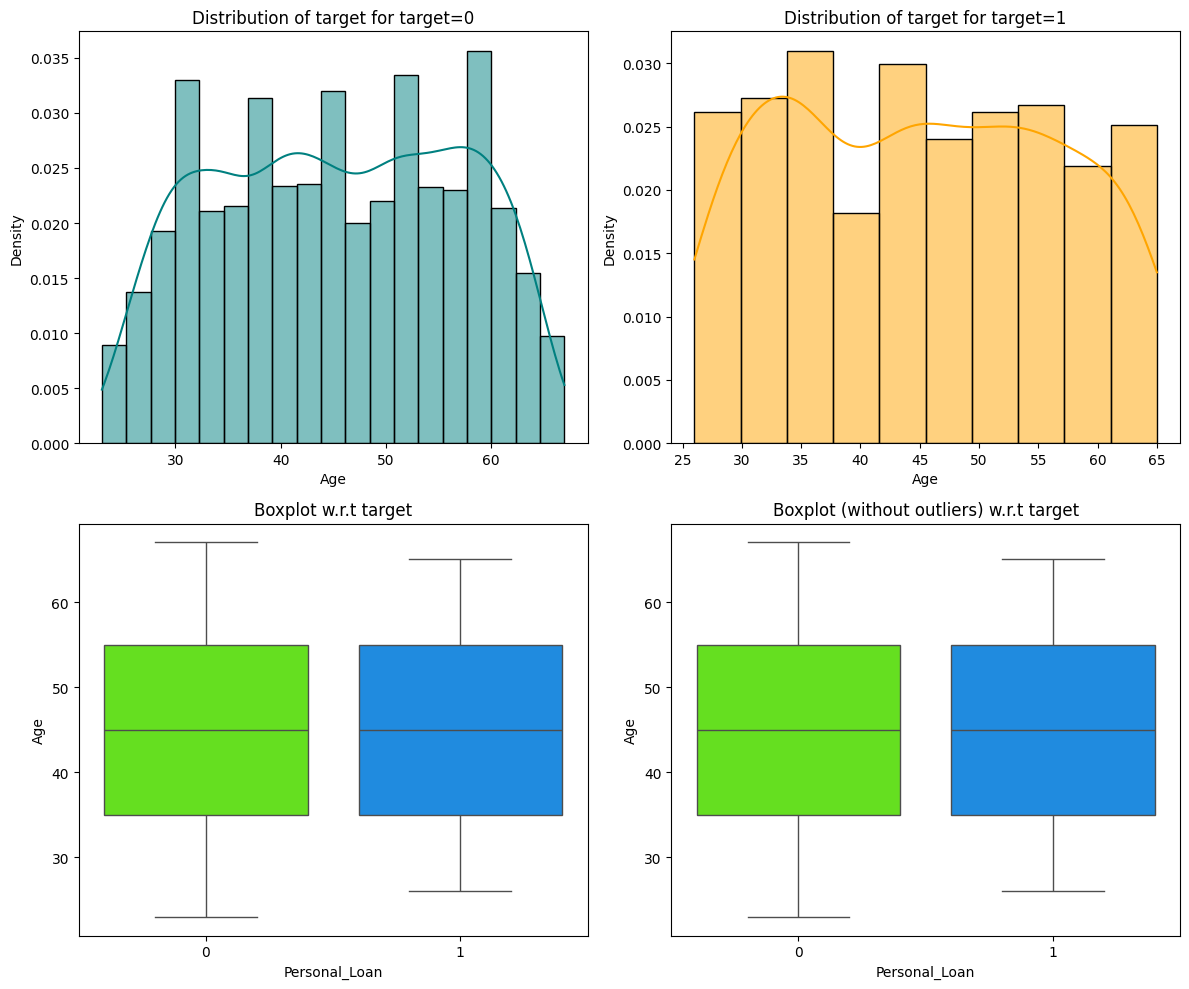

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**Observations**
* Customers who have applied for a personal loan are distributed widely across age compared to the customers not applied for a personal loan.

###Personal_Loan vs Income

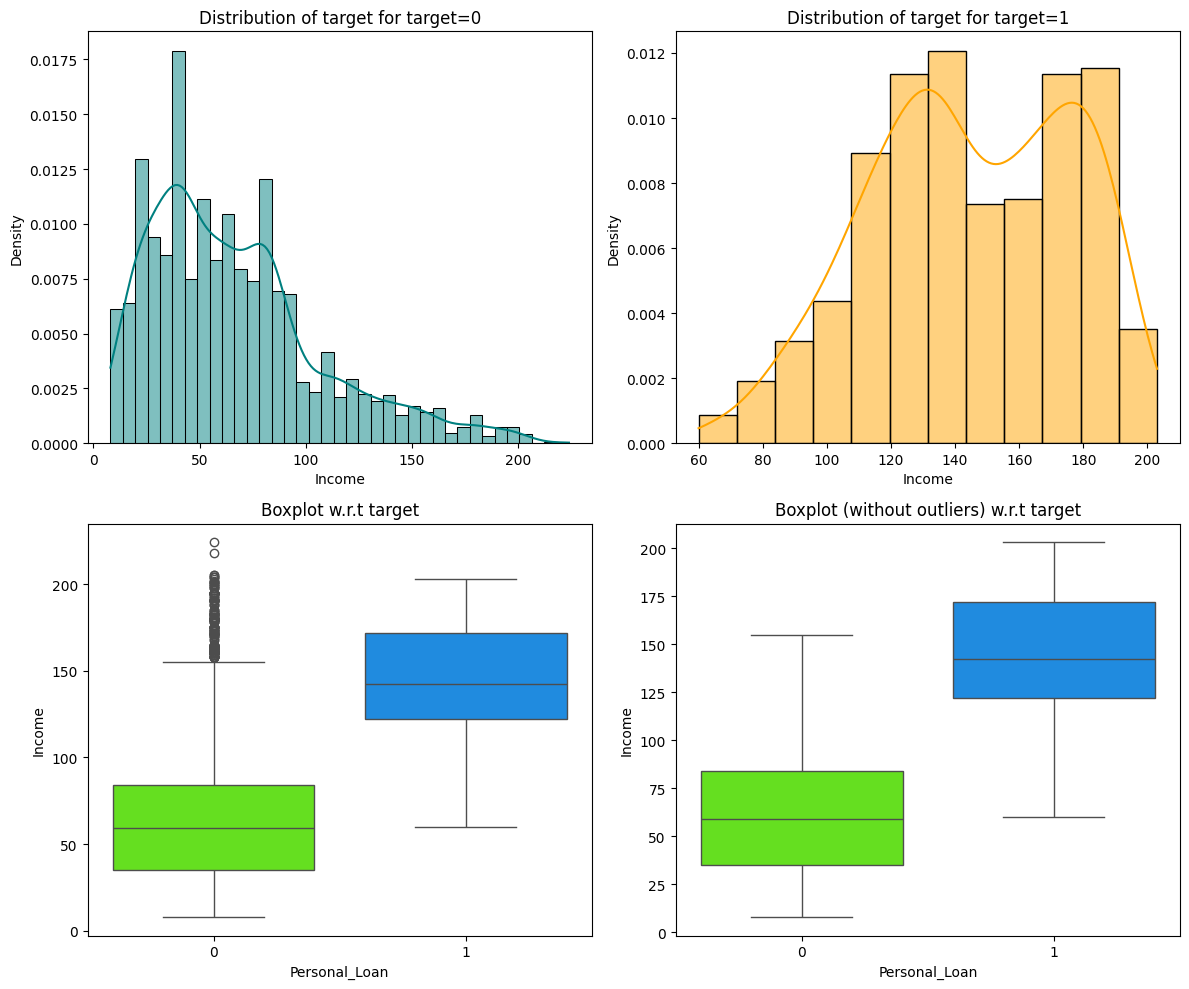

In [ ]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

**Observations**
* Customers with more than 90,000 dollars income have taken a personal loan. * Customers with more than 90,000 dollars income are a good fit to run a campaign for a personal loan.
* Customer Income plays significant role in and a big factor for taking a personal loan.

##Data Preprocessing (contd...)

### Outlier Detection

In [ ]:
Q1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


**Observations**
* We have seen some outliers in some of these data columns.
* For the model, we will not be removing them and let the model learn from those outliers.

### Data Preparation for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

X = X.astype(float)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

Possible scenarios:
1. Model predits a customer has taken a loan and customer actually took a personal loan.
2. Model predits a customer has not taken a loan and customer took a personal loan.
3. Model predits a customer has taken a loan and customer did not take a personal loan.
4. Model predits a customer has not taken a loan and customer did not take a personal loan.

In case of 3, model prediction is wrong and customer did not take a loan leads to loss of resources.
In case of 2, model prediction is wrong creating loss of opportunity.

To reduce false negatives, we need Recall score to be maximum possible.

The higher the Recall score the better to minimize false negatives.



First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

### Decision Tree (sklearn default)

In [ ]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

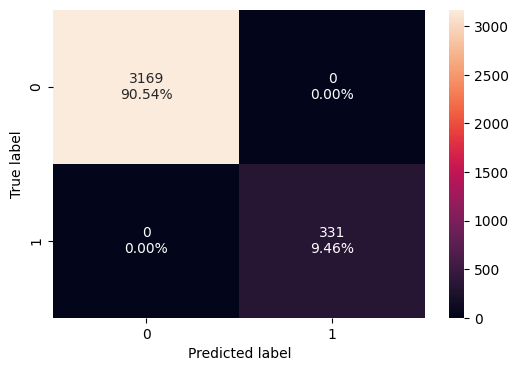

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observations**
* Model performance seems to be great on the training set. There are no errors and accuracy, recall, precision, and F1 scores are 1.
* Data seems to be overfit for the model. It needs to be trained more to get better accuracy.

#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_Professional', 'Education_Undergraduate']


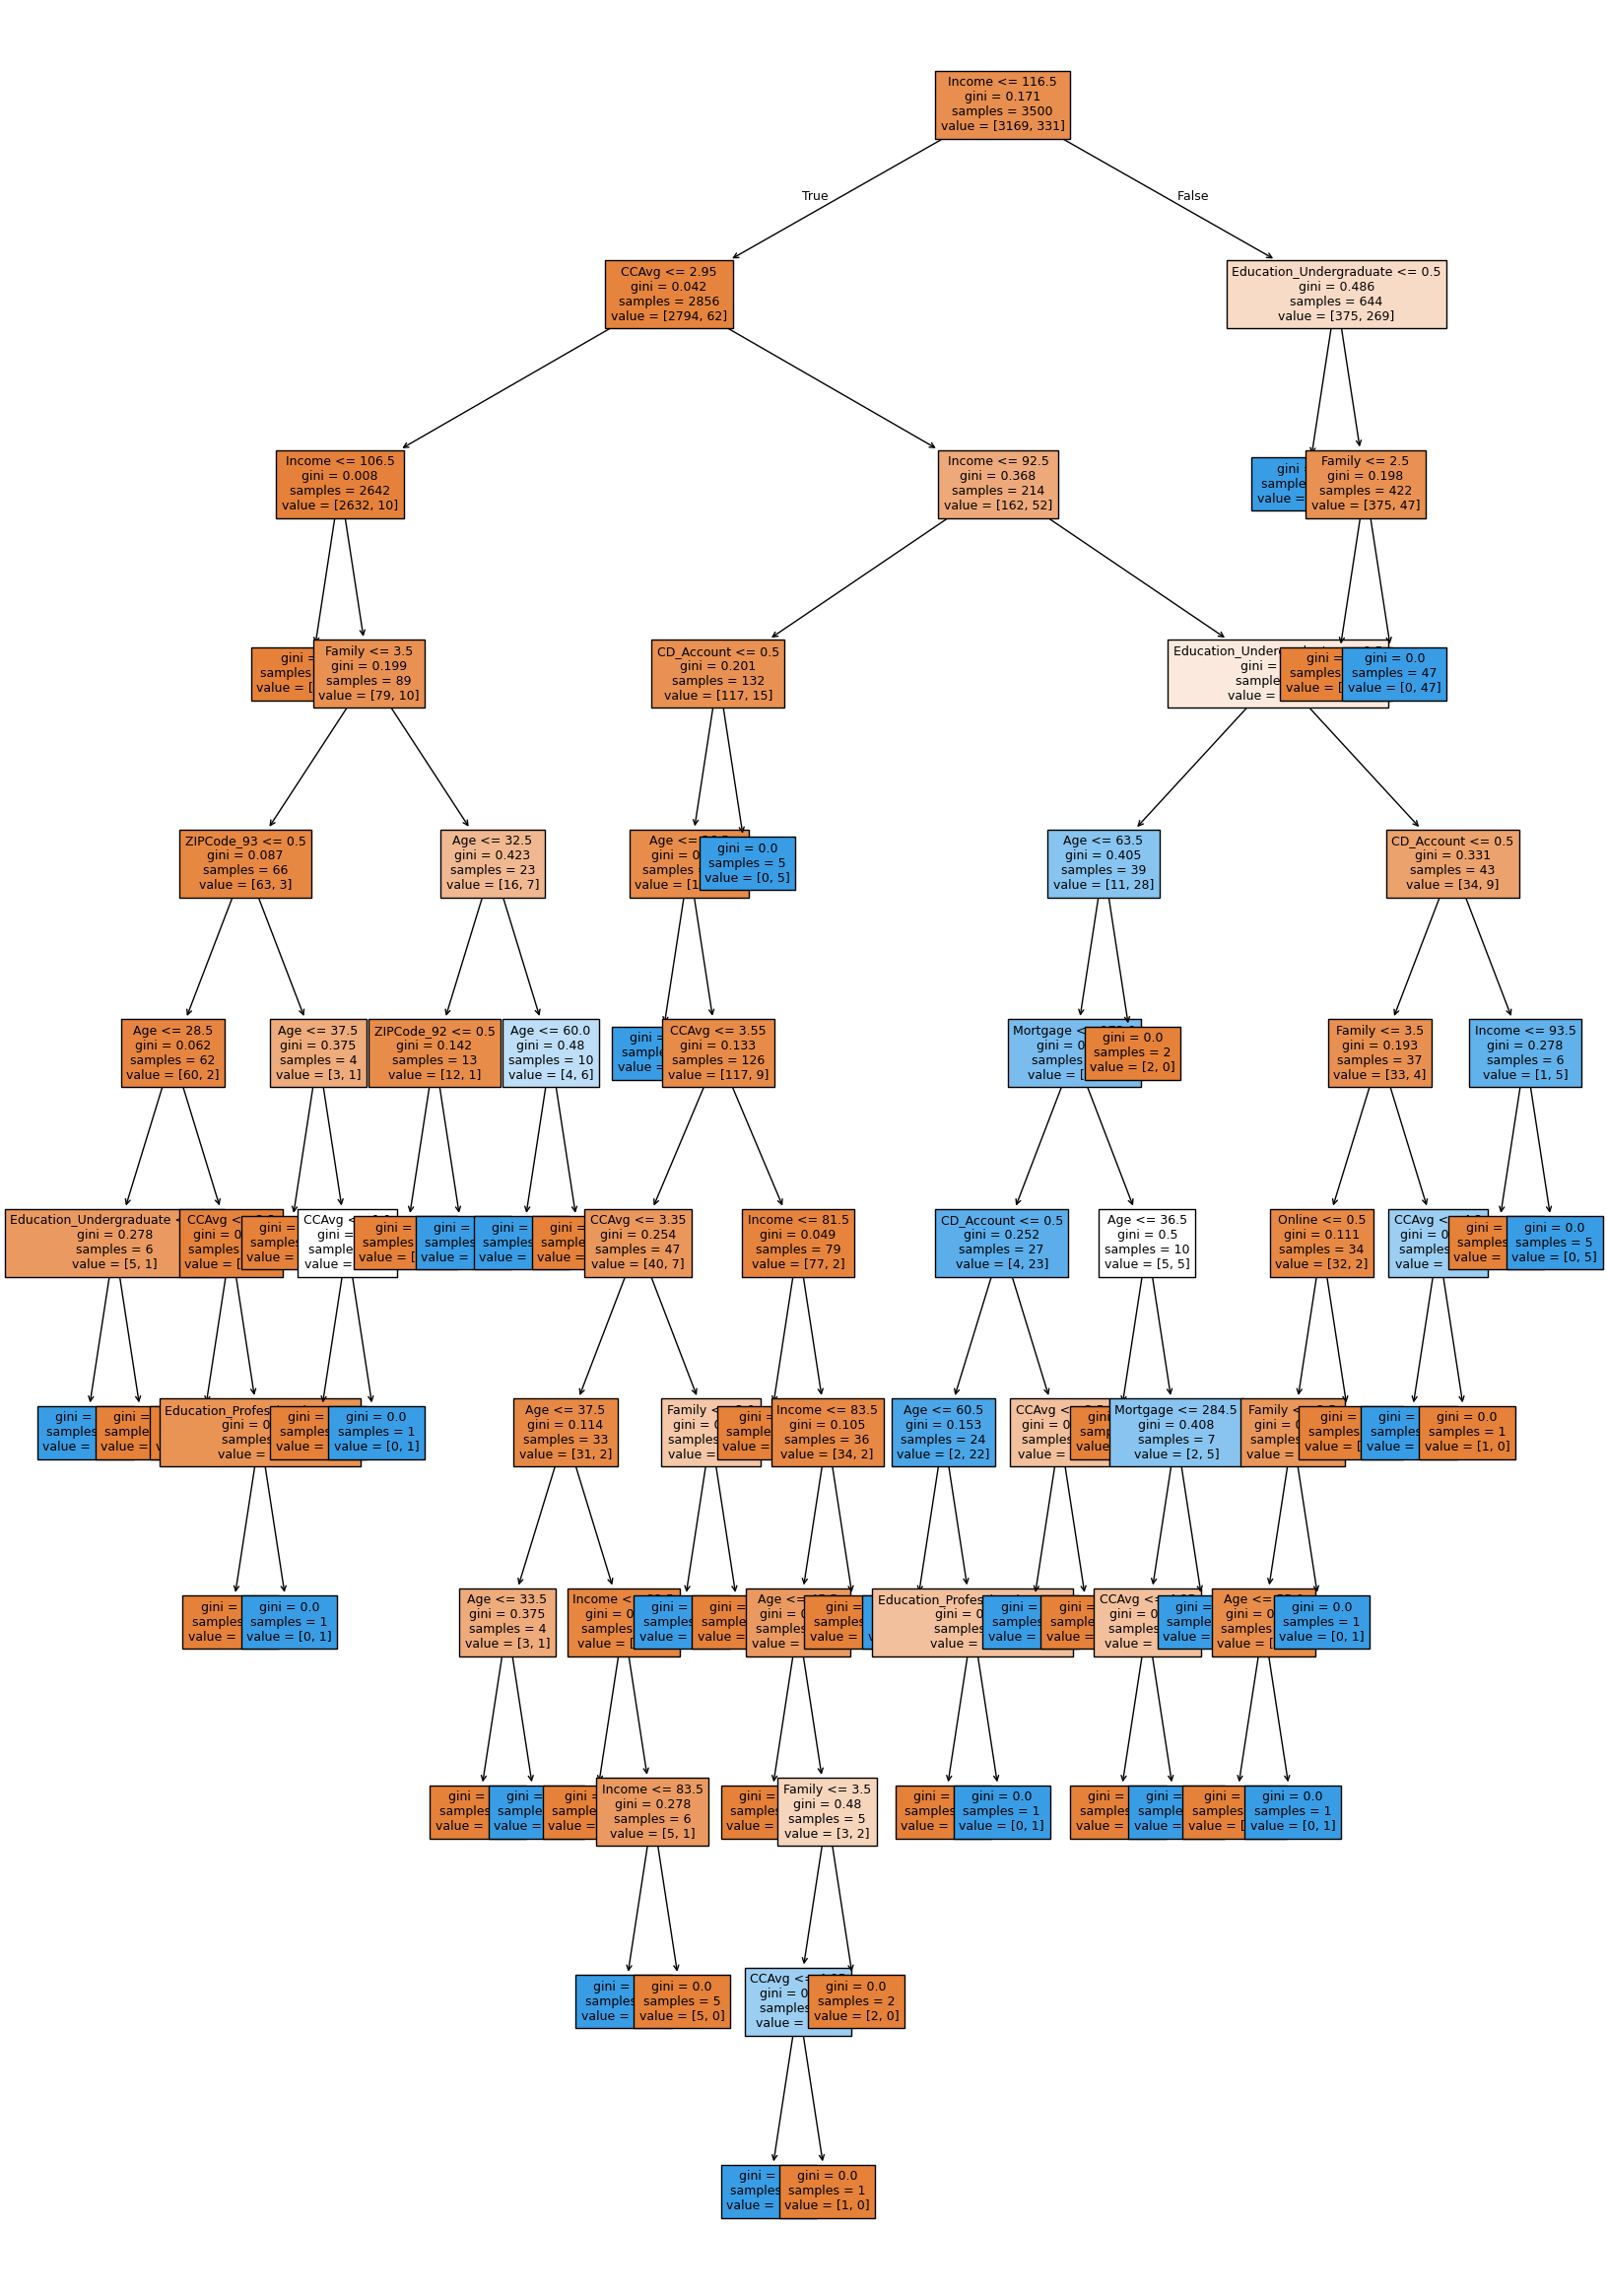

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model0,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model0, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_Professional <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_Professional >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93

In [ ]:
# importance of features in the tree building ( Gini importance )

print(
    pd.DataFrame(
        model0.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Education_Undergraduate  0.403732
Income                   0.304761
Family                   0.161717
CCAvg                    0.053107
Age                      0.036035
CD_Account               0.025711
Mortgage                 0.005557
Education_Professional   0.005144
ZIPCode_92               0.003080
ZIPCode_93               0.000594
Online                   0.000561
Securities_Account       0.000000
ZIPCode_91               0.000000
ZIPCode_94               0.000000
ZIPCode_95               0.000000
ZIPCode_96               0.000000
CreditCard               0.000000


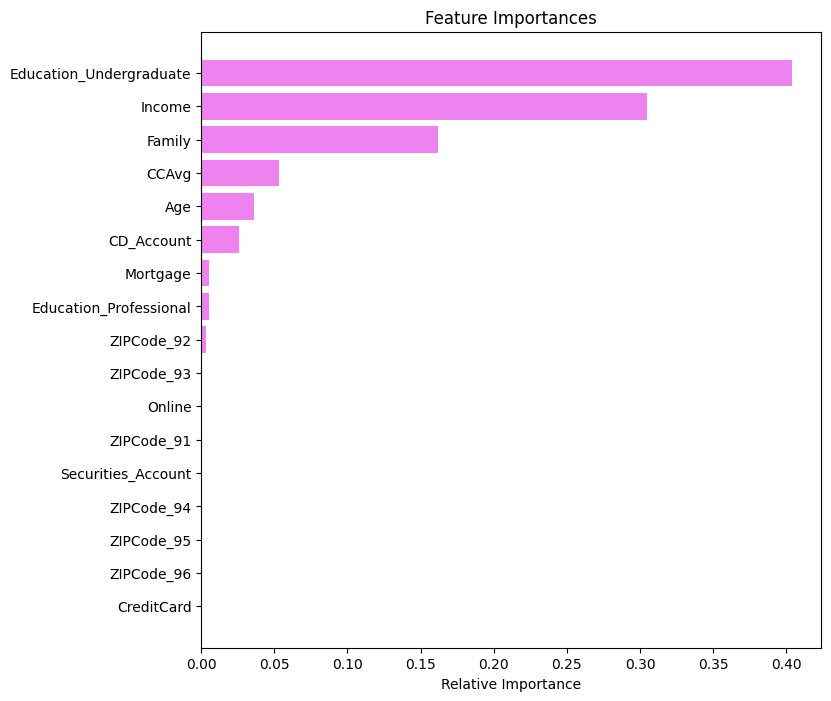

In [ ]:
importances = model0.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* Education Undergraduated is significant in predicting a customer taking personal loan.
* Income, Family, and CCAvg are also play a key role in determining customers ability to take a personal loan.

#### Checking model performance on test data

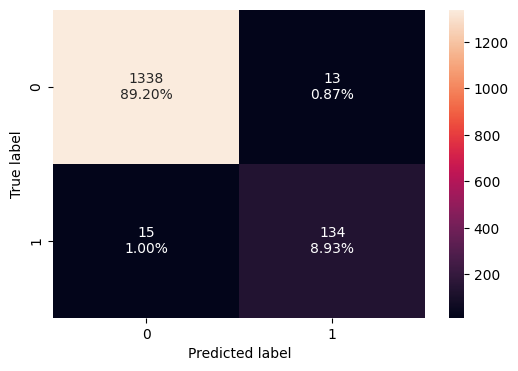

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.981333,0.899329,0.911565,0.905405


**Observations**
* Recall score came out to be little lower on the test data compared to the train data.

## Model Performance Improvement

###Pre-pruning

In [ ]:
# Define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]


# Initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')
best_test_score = 0.0

# Iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # Initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                class_weight='balanced',
                random_state=42
            )

            # Fit the model to the training data
            estimator.fit(X_train, y_train)

            # Make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # Calculate recall scores for training and test sets
            train_recall_score = recall_score(y_train, y_train_pred)
            test_recall_score = recall_score(y_test, y_test_pred)

            # Calculate the absolute difference between training and test recall scores
            score_diff = abs(train_recall_score - test_recall_score)

            # Update the best estimator and best score if the current one has a smaller score difference
            if (score_diff < best_score_diff) & (test_recall_score > best_test_score):
                best_score_diff = score_diff
                best_test_score = test_recall_score
                best_estimator = estimator

# creating an instance of the best model
model1 = best_estimator

# Print the best parameters
print("Best parameters found:")
print(f"Max depth: {best_estimator.max_depth}")
print(f"Max leaf nodes: {best_estimator.max_leaf_nodes}")
print(f"Min samples split: {best_estimator.min_samples_split}")
print(f"Best test recall score: {best_test_score}")

Best parameters found:
Max depth: 2
Max leaf nodes: 50
Min samples split: 10
Best test recall score: 1.0


###Checking performance on training data

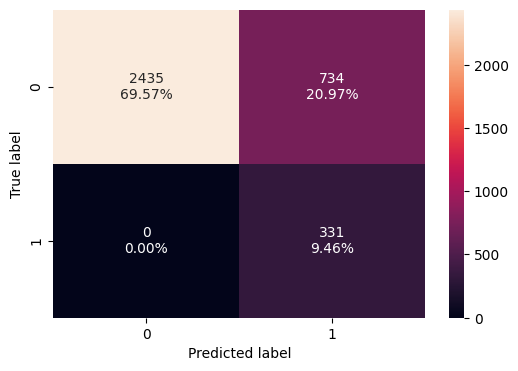

In [ ]:
confusion_matrix_sklearn(model1, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    model1, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.790286,1.0,0.310798,0.474212


###Visualizing the Decision Tree

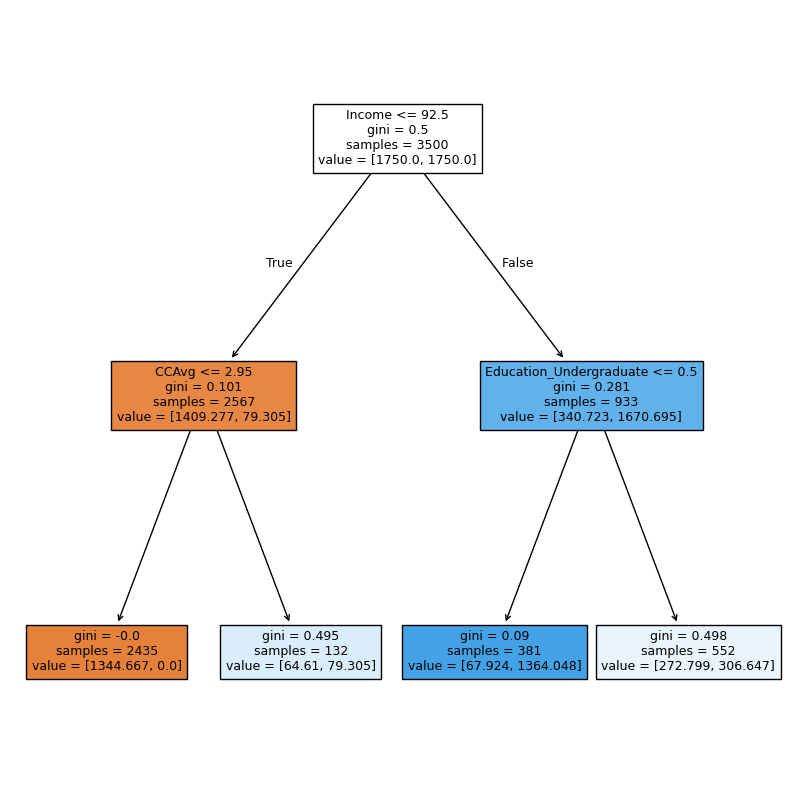

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    model1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree
print(tree.export_text(model1, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [67.92, 1364.05] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- weights: [272.80, 306.65] class: 1



**Observations**
* The tree is simplified to use the key features are Income, CCAvg, and Education_Undergraduate. A decision can be made with these features.
* Main criteria for the tree is now Income with a recall score of 92.5.

In [ ]:
# importance of features in the tree building ( Gini importance )

print(
    pd.DataFrame(
        model1.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.820072
Education_Undergraduate  0.117300
CCAvg                    0.062628
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
Family                   0.000000
CreditCard               0.000000


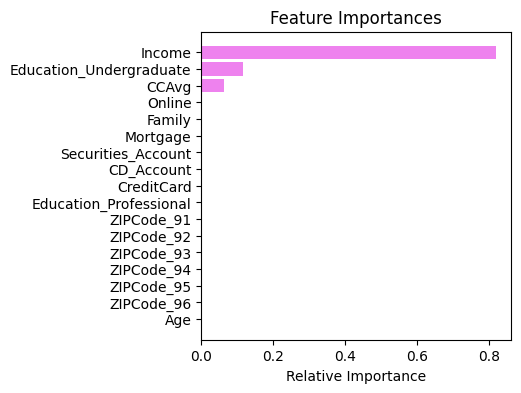

In [ ]:
importances = model1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(4, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**
* Income, Education_Undergraduate, and CCAvg are most important features in that order.
* All other features listed in the diagram are non-important.
* Based on the feature importance, the bank should run campaign with high income customers first.
* Combining Income, Education_Undergraduate, and CCAvg with high income bracket may lead to high conversion of customers taking a personal loan.

###Performance on test data

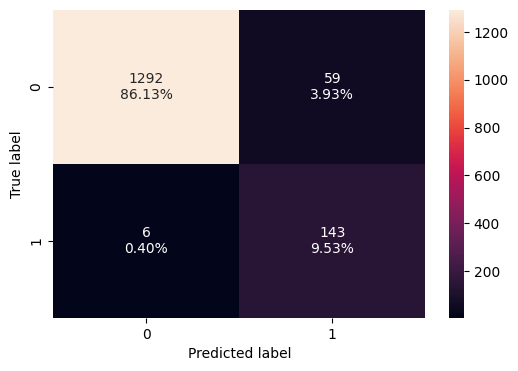

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.956667,0.959732,0.707921,0.814815


###Post-pruning

In [ ]:
#Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
#Check for the impurities
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000214,0.000429
2,0.000223,0.001542
3,0.000242,0.002750
4,0.000268,0.003824
5,0.000359,0.004900
6,0.000381,0.005280
7,0.000381,0.005661
8,0.000381,0.006042
9,0.000381,0.006423


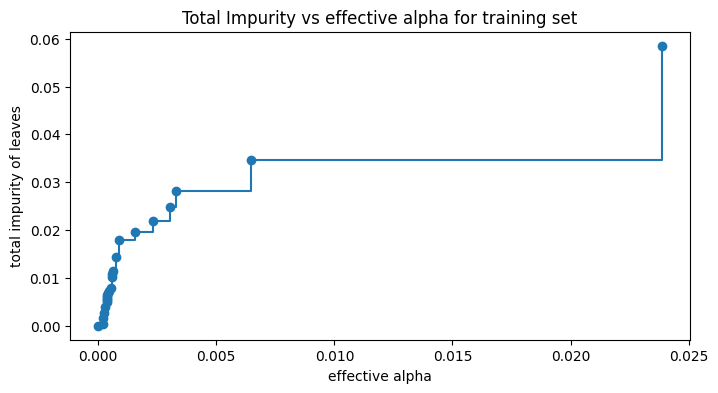

In [ ]:
#Plot total impurity vs effective alpha for the training set.
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


**Observations**
* The plot uses the last value of ccp_alphas and the last value of impurities.
* Number of nodes in the last tree is: 1
* ccp_alpha: 0.056364969335601575

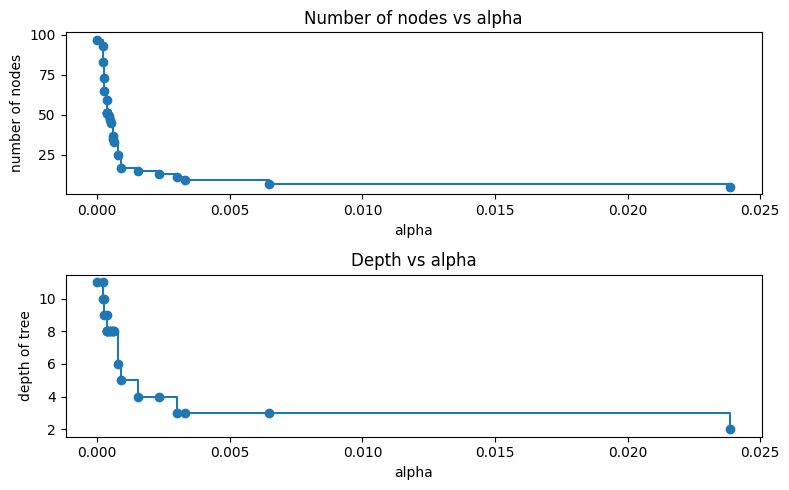

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(8, 5))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Observations**
* With increasing alpha, number of nodes are decreasing.
* With increasing alpha, depth of tree is decreasing.

####Recall vs alpha for training and testing sets

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

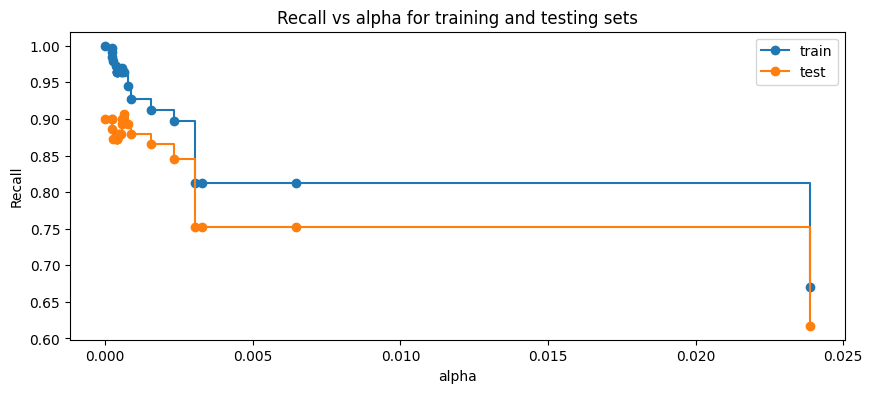

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
model2 = best_model
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)


**Observations**
* Best fit model returns the same decision tree as our decision tree without pruning.

In [ ]:
estimator_2 = DecisionTreeClassifier( ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.056364969335601575,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

####Checking performance on training data

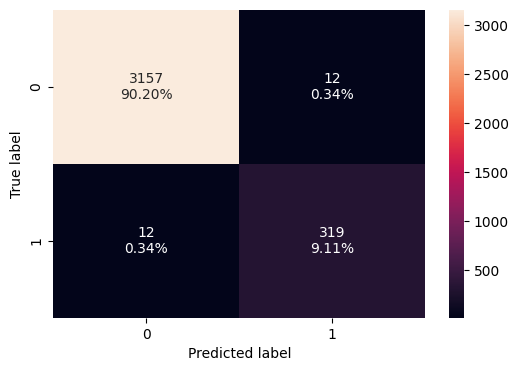

In [ ]:
confusion_matrix_sklearn(model2, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(model2, X_train, y_train)
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.993143,0.963746,0.963746,0.963746


####Visualizing the Decision Tree

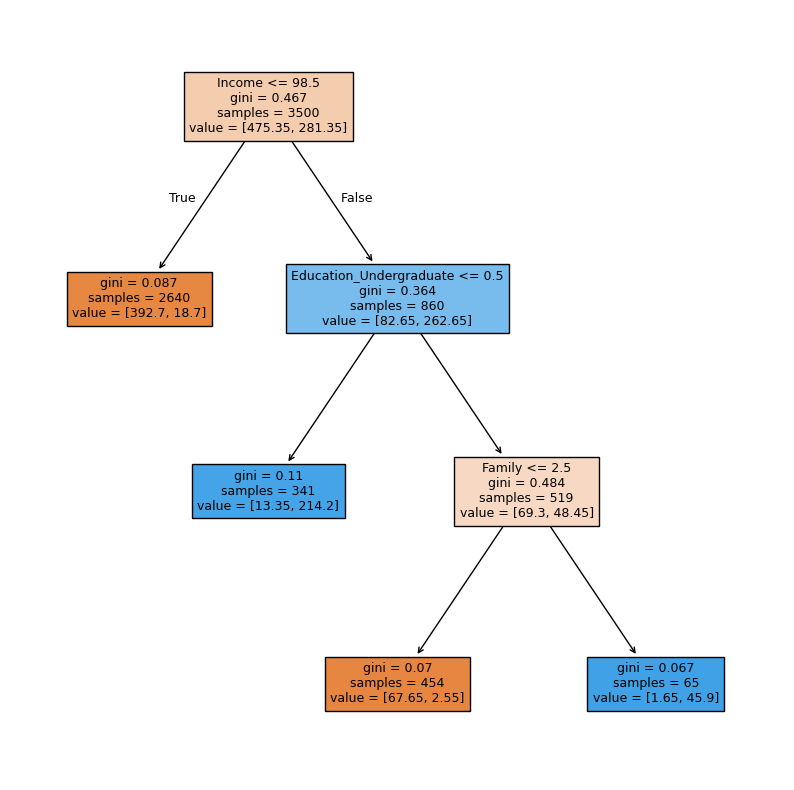

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of the decision tree above

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                              Imp
Income                   0.674921
Family                   0.171953
Education_Undergraduate  0.153126
ZIPCode_92               0.000000
Education_Professional   0.000000
ZIPCode_96               0.000000
ZIPCode_95               0.000000
ZIPCode_94               0.000000
ZIPCode_93               0.000000
Age                      0.000000
ZIPCode_91               0.000000
Online                   0.000000
CD_Account               0.000000
Securities_Account       0.000000
Mortgage                 0.000000
CCAvg                    0.000000
CreditCard               0.000000


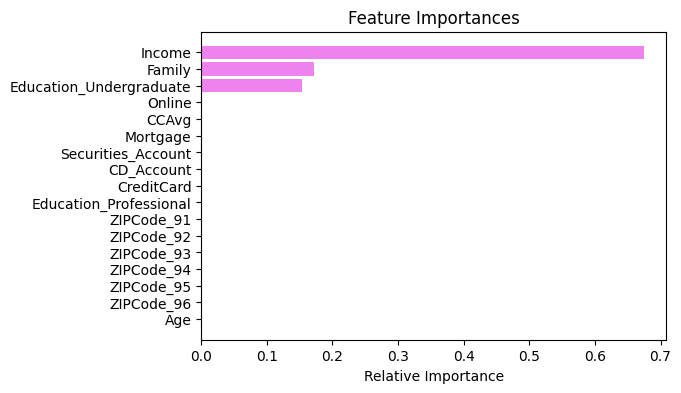

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

####Checking performance on test data

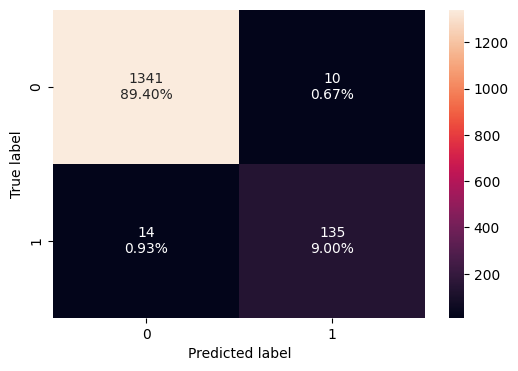

In [ ]:
confusion_matrix_sklearn(model2, X_test, y_test)

In [ ]:
# Complete the code to get the model performance on test data
decision_tree_tune_post_test = model_performance_classification_sklearn(model2, X_test, y_test)
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


## Model Performance Comparison and Final Model Selection

####Training model performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.790286,0.993143
Recall,1.0,1.000000,0.963746
Precision,1.0,0.310798,0.963746
F1,1.0,0.474212,0.963746


####Testing model performance comparison

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,
)
models_test_comp_df.columns = ["Decision Tree (sklearn default)", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.981333,0.956667,0.984000
Recall,0.899329,0.959732,0.906040
Precision,0.911565,0.707921,0.931034
F1,0.905405,0.814815,0.918367


## Actionable Insights and Business Recommendations


**What recommedations would you suggest to the bank?**

* Based on the model performance on the trained data and the test data, the model has very high accuracy in predicting customer taking personal loan correctly.

* The bank can make use of the model to predict new customers of taking a personal loan.

* *Following are the features which drove customers making a decision in taking a personal loan*
  - Income
  - Education
  - Family
  - CCAvg
  - CD_Account

  `Income, Family, and Education are the most important attributes.`

* *Customer segments to target:*
  - Customers with income 115,000 dollars or above.
  - Customers with a family of 2 or more.
  - Customers with graduation or higher.
  - Customer with a CD account also show tendency of taking a personal loan (50% chance based on the analysis)


___